<a href="https://colab.research.google.com/github/Nikhil14091997/ML-ZoomCamp/blob/main/Week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset
In this homework, we will use the New York City Airbnb Open Data. You can take it from Kaggle or download from here if you don't want to sign up to Kaggle.

The goal of this homework is to create a regression model for prediction apartment prices (column 'price').

**EDA**

Load the data.

Look at the price variable. Does it have a long tail?

Features

For the rest of the homework, you'll need to use only these columns:


```
'latitude',
'longitude',
'price',
'minimum_nights',
'number_of_reviews',
'reviews_per_month',
'calculated_host_listings_count',
'availability_365'
Select only them.
```



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [2]:
dataset = pd.read_csv('AB_NYC_2019.csv')
dataset.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


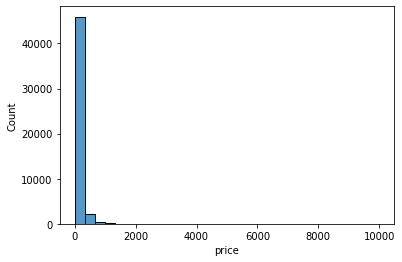

In [3]:
sns.histplot(dataset.price, bins = 30)

In [4]:
cols = [
        'latitude',
        'longitude',
        'price',
        'minimum_nights',
        'number_of_reviews',
        'reviews_per_month',
        'calculated_host_listings_count',
        'availability_365'
        ]
# getting the data frame with the mentioned columns
df = dataset[cols]
df.tail()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
48890,40.67853,-73.94995,70,2,0,NaN,2,9
48891,40.70184,-73.93317,40,4,0,NaN,2,36
48892,40.81475,-73.94867,115,10,0,NaN,1,27
48893,40.75751,-73.99112,55,1,0,NaN,6,2
48894,40.76404,-73.98933,90,7,0,NaN,1,23


# Question 1
Find a feature with missing values. How many missing values does it have?

In [5]:
df.isnull().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

According the code: reviews_per_month        has         10052 missing values

# Question 2
What's the median (50% percentile) for variable 'minimum_nights'?

In [6]:
median = df['minimum_nights'].median()
median

3.0

# Split the data

```
1. Shuffle the initial dataset, use seed 42.
2. Split your data in train/val/test sets, with 60%/20%/20% distribution.
3. Make sure that the target value ('price') is not in your dataframe.
4. Apply the log transformation to the price variable using the np.log1p() function.




```



In [7]:
np.random.seed(42)
n = len(df)
#print(n)
n_val = int(0.2 * n)
n_test =  int(0.2 * n)
n_train = n - (n_val + n_test)
#print(n_val, n_test, n_train)
idx = np.arange(n)
#  Shuffle the initial dataset, use seed 42.
np.random.shuffle(idx)
df_shuffled = df.iloc[idx]
# Split your data in train/val/test sets, with 60%/20%/20% distribution.
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()
# Make sure that the target value ('price') is not in your dataframe.
# Apply the log transformation to the price variable using the np.log1p() function.
y_train_orig = df_train.price.values
y_val_orig = df_val.price.values
y_test_orig = df_test.price.values

y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)


del df_train['price']
del df_val['price']
del df_test['price']




# Question 3

*  We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
*   Try both options. For each, train a linear regression model without regularization using the code from the lessons.
*  For computing the mean, use the training only!
*  Use the validation dataset to evaluate the models and compare the RMSE of each option.
*  Round the RMSE scores to 2 decimal digits using round(score, 2)
*  Which option gives better RMSE?



In [8]:
df_train.head()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
879,40.64354,-73.97777,3,62,0.71,1,189
44383,40.70666,-73.90779,21,0,NaN,1,73
15394,40.76116,-73.99016,2,17,0.43,1,0
43230,40.70763,-74.01050,2,5,1.88,327,272
16332,40.79658,-73.93287,2,30,0.80,1,30


In [9]:
def prepare_data_0(df):
  df1 = df.copy()
  df1 = df1.fillna(0)
  return df1.values

In [10]:
def prepare_data_mean(df):
  df2 = df.copy()
  df2 = df2.fillna(df2['reviews_per_month'].mean())
  return df2.values

In [11]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [12]:
X_train_0 = prepare_data_0(df_train)
X_train_mean = prepare_data_mean(df_train)
w_0_0, w_0 = train_linear_regression(X_train_0, y_train)
w_mean_0, w_mean = train_linear_regression(X_train_mean, y_train)

In [13]:
y_pred_0 = w_0_0 + X_train_0.dot(w_0)
y_pred_mean = w_mean_0 + X_train_mean.dot(w_mean)

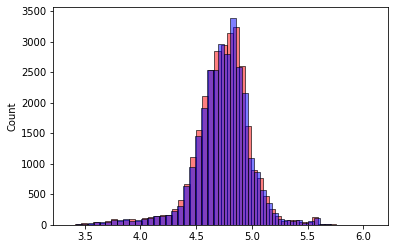

In [14]:
sns.histplot(y_pred_0, color='red', alpha=0.5, bins=50)
sns.histplot(y_pred_mean, color='blue', alpha=0.5, bins=50)

In [15]:
X_val_0 = prepare_data_0(df_val)
X_val_mean = prepare_data_mean(df_val)
y_pred_val_0 = w_0_0 + X_val_0.dot(w_0)
y_pred_val_mean = w_mean_0 + X_val_mean.dot(w_mean)

In [16]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [17]:
np.round(rmse(y_train, y_pred_0),2)

0.64

In [18]:
np.round(rmse(y_train, y_pred_mean),2)

0.64

In [19]:
np.round(rmse(y_val, y_pred_val_0),2)

0.64

In [20]:
np.round(rmse(y_val, y_pred_val_mean),2)

0.64

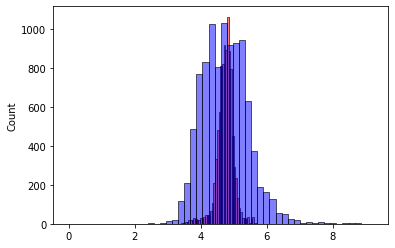

In [21]:
sns.histplot(y_pred_val_0, color='red', alpha=0.5, bins=50)
sns.histplot(y_val, color='blue', alpha=0.5, bins=50)

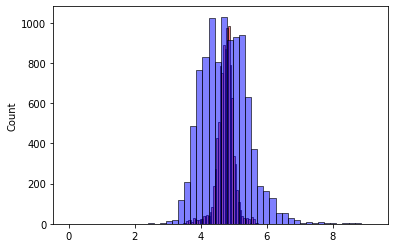

In [22]:
sns.histplot(y_pred_val_mean, color='red', alpha=0.5, bins=50)
sns.histplot(y_val, color='blue', alpha=0.5, bins=50)

# Question 4




```
Now let's train a regularized linear regression.
For this question, fill the NAs with 0.
Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
Use RMSE to evaluate the model on the validation dataset.
Round the RMSE scores to 2 decimal digits.
Which r gives the best RMSE?
```




In [23]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [24]:
w_reg_0, w_reg = train_linear_regression_reg(X_train_0, y_train)
y_pred_reg = w_reg_0 + X_train_0.dot(w_reg)

In [25]:
np.round(rmse(y_train, y_pred_reg),2)

0.64

In [26]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    X_train = prepare_data_0(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_data_0(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    score = np.round(score,2)
    print(r, w0, score)
    

0 -419.91265807142094 0.64
1e-06 -419.8627153336333 0.64
0.0001 -414.97649233703777 0.64
0.001 -375.27365241862066 0.64
0.01 -191.78384049339815 0.66
0.1 -32.56256054966786 0.68
1 -3.4992168354209157 0.68
5 -0.7033623171188026 0.68
10 -0.35127675921831375 0.68


In [27]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
  X_train = prepare_data_0(df_train)
  w0, w = train_linear_regression_reg(X_train, y_train, r=r)
  X_val = prepare_data_0(df_val)
  y_pred = w0 + X_val.dot(w)
  score = rmse(y_val, y_pred)
  score = np.round(score, 2)
  print("For r = ", r, " \t RMSE is : ", score)

For r =  0  	 RMSE is :  0.64
For r =  1e-06  	 RMSE is :  0.64
For r =  0.0001  	 RMSE is :  0.64
For r =  0.001  	 RMSE is :  0.64
For r =  0.01  	 RMSE is :  0.66
For r =  0.1  	 RMSE is :  0.68
For r =  1  	 RMSE is :  0.68
For r =  5  	 RMSE is :  0.68
For r =  10  	 RMSE is :  0.68


For r =  0.001  	 RMSE is :  0.64
Looks like a gooad option

# Question 5

*   We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
* What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
* Round the result to 3 decimal digits (round(std, 3))


Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.





In [28]:
score_seed = []
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
  np.random.seed(seed)
  n = len(df)
  #print(n)
  n_val = int(0.2 * n)
  n_test =  int(0.2 * n)
  n_train = n - (n_val + n_test)
  #print(n_val, n_test, n_train)
  idx = np.arange(n)
  #  Shuffle the initial dataset, use seed 42.
  np.random.shuffle(idx)
  df_shuffled = df.iloc[idx]
  # Split your data in train/val/test sets, with 60%/20%/20% distribution.
  df_train = df_shuffled.iloc[:n_train].copy()
  df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
  df_test = df_shuffled.iloc[n_train+n_val:].copy()
  # Make sure that the target value ('price') is not in your dataframe.
  # Apply the log transformation to the price variable using the np.log1p() function.
  y_train_orig = df_train.price.values
  y_val_orig = df_val.price.values
  y_test_orig = df_test.price.values

  y_train = np.log1p(df_train.price.values)
  y_val = np.log1p(df_val.price.values)
  y_test = np.log1p(df_test.price.values)


  del df_train['price']
  del df_val['price']
  del df_test['price']

  #Fill the missing values with 0 and train a model without regularization.
  X_train_0 = prepare_data_0(df_train)
  w_0_0, w_0 = train_linear_regression(X_train_0, y_train)

  # For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
  X_val_0 = prepare_data_0(df_val)
  y_pred_val_0 = w_0_0 + X_val_0.dot(w_0)

  # RMSE 
  score = rmse(y_val, y_pred_val_0)
  score_seed.append(score)
  score = np.round(score,2)
  print("For seed = ", seed, " \t RMSE score : ", score)

# What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
# Round the result to 3 decimal digits (round(std, 3))
print("The Standard Deviation of scores for different seed values is :\t", np.round(np.std(score_seed),3))


For seed =  0  	 RMSE score :  0.65
For seed =  1  	 RMSE score :  0.65
For seed =  2  	 RMSE score :  0.65
For seed =  3  	 RMSE score :  0.64
For seed =  4  	 RMSE score :  0.64
For seed =  5  	 RMSE score :  0.63
For seed =  6  	 RMSE score :  0.63
For seed =  7  	 RMSE score :  0.65
For seed =  8  	 RMSE score :  0.65
For seed =  9  	 RMSE score :  0.64
The Standard Deviation of scores for different seed values is :	 0.008


# Question 6
* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with r=0.001.
* What's the RMSE on the test dataset?

In [29]:
# Split the dataset like previously, use seed 9.

np.random.seed(9)
n = len(df)
#print(n)
n_val = int(0.2 * n)
n_test =  int(0.2 * n)
n_train = n - (n_val + n_test)
#print(n_val, n_test, n_train)
idx = np.arange(n)
#  Shuffle the initial dataset, use seed 42.
np.random.shuffle(idx)
df_shuffled = df.iloc[idx]
# Split your data in train/val/test sets, with 60%/20%/20% distribution.
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()
# Make sure that the target value ('price') is not in your dataframe.
# Apply the log transformation to the price variable using the np.log1p() function.
y_train_orig = df_train.price.values
y_val_orig = df_val.price.values
y_test_orig = df_test.price.values

y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)


del df_train['price']
del df_val['price']
del df_test['price']

In [30]:
# Combine train and validation datasets. 

df_train_full = pd.concat([df_train, df_val])
df_train_full = df_train_full.reset_index(drop = True)
df_train_full

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.70423,-73.91595,1,3,0.13,1,0
1,40.77115,-73.92275,40,23,0.27,1,207
2,40.70401,-74.00932,29,0,NaN,96,1
3,40.74526,-73.97679,30,1,0.04,23,365
4,40.59349,-73.76377,1,1,0.16,1,90
...,...,...,...,...,...,...,...
39111,40.69440,-73.92420,3,26,2.43,1,3
39112,40.67133,-73.94526,2,8,0.40,1,0
39113,40.72982,-73.98593,2,2,0.11,1,0
39114,40.71969,-73.95620,1,1,0.02,1,0


In [31]:
# Fill the missing values with 0
X_train_full = prepare_data_0(df_train_full)
X_train_full

array([[ 4.070423e+01, -7.391595e+01,  1.000000e+00, ...,  1.300000e-01,
         1.000000e+00,  0.000000e+00],
       [ 4.077115e+01, -7.392275e+01,  4.000000e+01, ...,  2.700000e-01,
         1.000000e+00,  2.070000e+02],
       [ 4.070401e+01, -7.400932e+01,  2.900000e+01, ...,  0.000000e+00,
         9.600000e+01,  1.000000e+00],
       ...,
       [ 4.072982e+01, -7.398593e+01,  2.000000e+00, ...,  1.100000e-01,
         1.000000e+00,  0.000000e+00],
       [ 4.071969e+01, -7.395620e+01,  1.000000e+00, ...,  2.000000e-02,
         1.000000e+00,  0.000000e+00],
       [ 4.066949e+01, -7.392172e+01,  1.000000e+00, ...,  1.910000e+00,
         2.000000e+00,  3.230000e+02]])

In [32]:
y_train_full = np.concatenate([y_train, y_val])
y_train_full

array([4.33073334, 4.24849524, 5.19295685, ..., 4.94875989, 5.37527841,
       4.18965474])

In [33]:
#  train a model with r=0.001
w0, w = train_linear_regression_reg(X_train_full, y_train_full, r=0.001)
print(w0, w)


-389.1162944988868 [ 1.21715497e+00 -4.65471642e+00 -7.46757415e-04 -4.79157368e-04
 -7.65848383e-03  1.39687364e-03  6.06247709e-04]


In [34]:
X_test = prepare_data_0(df_test)
prediction = w0 + X_test.dot(w)
prediction

array([4.97555157, 4.41400754, 4.82798035, ..., 4.65114636, 4.87922308,
       4.82319647])

In [36]:
score_test = rmse(y_test, prediction)
print("Score on test data:\t", np.round(score_test,2))

Score on test data:	 0.65
